{9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000}


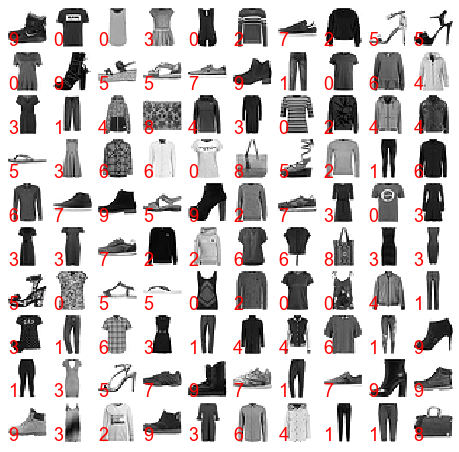

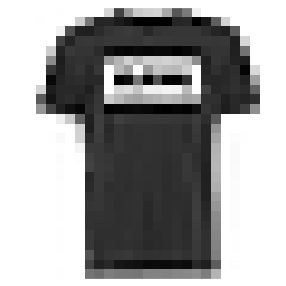

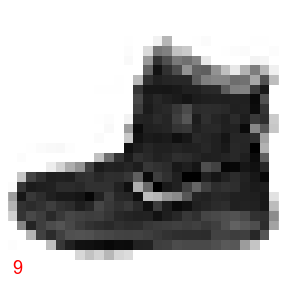

In [10]:
def load_mnist(path = '/put_your_path_to_dataset_here', kind='train'):
    import os
    import gzip
    
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

import time
import pandas as pd
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

rand_seed = 17

X_train, y_train = load_mnist('/put_your_path_to_dataset_here', kind='train')

X_train2 = X_train.reshape((60000,28,28))

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    image = ax.imshow(X_train2[i], cmap='binary', interpolation='nearest')
    index = ax.text(0.02, 0.02, str(y_train[i]),
            transform=ax.transAxes, color='red')
    
examples = {}
for target in y_train:
    examples[target] = examples.get(target, 0) + 1
print(examples)

N = 0
def show_item(images, classes, desired_class):
    fig, axes = plt.subplots(1, 1, figsize=(5, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for index, candidate_class in enumerate(classes):
        if candidate_class == desired_class:
            axes.imshow(images[index], cmap='binary', interpolation='nearest')
            return
show_item (X_train2, y_train, N)
# Finding the first image based on its class

N = 0
def show_item(images, classes, index):
    fig, axes = plt.subplots(1, 1, figsize=(5, 5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    axes.imshow(images[index], cmap='binary', interpolation='nearest')
    axes.text(0.02, 0.02, str(classes[index]), transform=axes.transAxes, color='red')
show_item (X_train2, y_train, N)
# Finding the first image based on its count number

In [92]:
X_subset = X_train[0:5000]
y_subset = y_train[0:5000]

examples = {}
for target in y_subset:
    examples[target] = examples.get(target, 0) + 1
examples

{9: 506,
 0: 457,
 3: 501,
 2: 504,
 7: 512,
 5: 493,
 1: 556,
 6: 493,
 4: 488,
 8: 490}

PCA completed...  Time elapsed: 0.005560159683227539 seconds
Variance explained per principal component: [0.39051358 0.23853715 0.11157291 0.10757951 0.0684845  0.05309523]


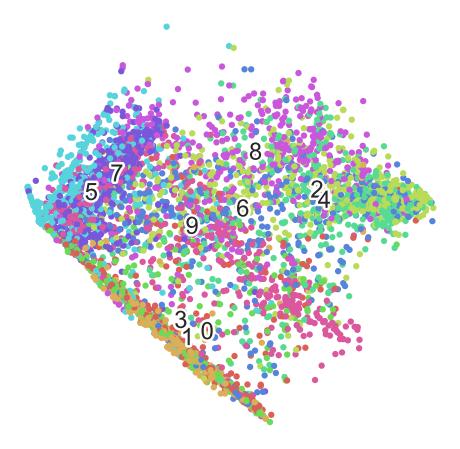

In [94]:
import random

time_start = time.time()

X_subset_sparse= np.vstack((
    X_subset[:,random.randint(100, len(X_train[0]) - 100)], 
    X_subset[:,random.randint(100, len(X_train[0]) - 100)], 
    X_subset[:,random.randint(100, len(X_train[0]) - 100)],
    X_subset[:,random.randint(100, len(X_train[0]) - 100)],
    X_subset[:,random.randint(100, len(X_train[0]) - 100)],
    X_subset[:,random.randint(100, len(X_train[0]) - 100)],
    X_subset[:,random.randint(100, len(X_train[0]) - 100)],
    X_subset[:,random.randint(100, len(X_train[0]) - 100)]
)).T

pca = PCA(n_components=6)
pca_result = pca.fit_transform(X_subset_sparse)

print('PCA completed...  Time elapsed: {} seconds'.format(time.time()-time_start))

df_pca = pd.DataFrame(columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])

df_pca['pc1'] = pca_result[:,0]
df_pca['pc2'] = pca_result[:,1]
df_pca['pc3'] = pca_result[:,2]
df_pca['pc4'] = pca_result[:,3]
df_pca['pc5'] = pca_result[:,4]
df_pca['pc6'] = pca_result[:,5]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

def fashion_viz(x, colors):
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    txts = [ ]

    for i in range(num_classes):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return

random_two_dim = df_pca[['pc1','pc2']]
fashion_viz(random_two_dim.values,y_subset)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE completed...  Time elapsed: 5.356044054031372 seconds
PCA with 35 components completed... Time elapsed: 0.11867713928222656 seconds
Cumulative variance explained by 35 principal components: 0.8372303584605938


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE completed...  Time elapsed: 5.185273885726929 seconds


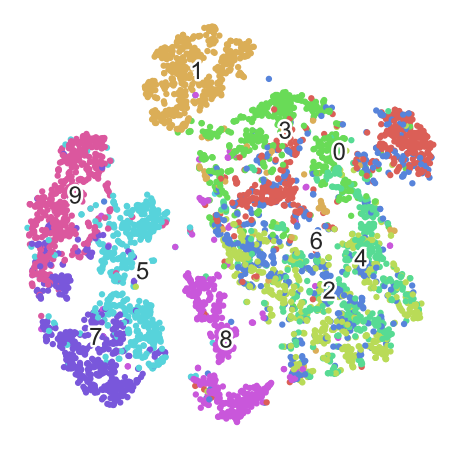

In [106]:
from sklearn.manifold import TSNE

time_start = time.time()
fashion_tsne = TSNE(random_state=rand_seed, n_iter=500).fit_transform(X_subset)
print ('t-SNE completed...  Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()
pca_35 = PCA(n_components=35)
pca_result_35 = pca_35.fit_transform(X_subset)
print ('PCA with 35 components completed... Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Cumulative variance explained by 35 principal components: {}'.format(np.sum(pca_35.explained_variance_ratio_)))

time_start = time.time()
fashion_pca_tsne = TSNE(random_state=rand_seed, n_iter=500).fit_transform(pca_result_35)
print ('t-SNE completed...  Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_viz(fashion_pca_tsne, y_subset)

# This visualisation is much better

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE completed...  Time elapsed: 5.354050159454346 seconds
PCA with 784 components completed... Time elapsed: 0.29935503005981445 seconds
Cumulative variance explained by 784 principal components: 1.0000000000000002


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE completed...  Time elapsed: 5.481315851211548 seconds


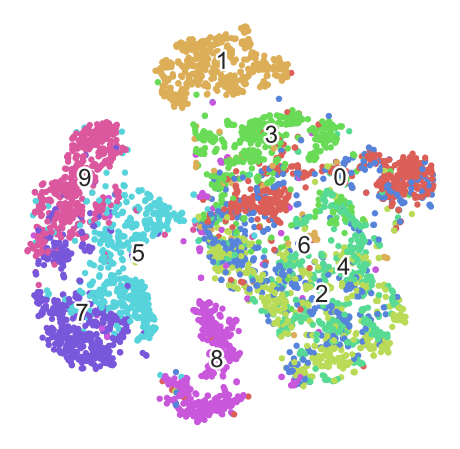

In [107]:
time_start = time.time()
fashion_tsne = TSNE(random_state=rand_seed, n_iter=500).fit_transform(X_subset)
print ('t-SNE completed...  Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()
pca_784 = PCA(n_components=784)
pca_result_784 = pca_784.fit_transform(X_subset)
print ('PCA with 784 components completed... Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Cumulative variance explained by 784 principal components: {}'.format(np.sum(pca_784.explained_variance_ratio_)))

time_start = time.time()
fashion_pca_tsne = TSNE(random_state=rand_seed, n_iter=500).fit_transform(pca_result_784)
print ('t-SNE completed...  Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_viz(fashion_pca_tsne, y_subset)

# More components don't really make it distinctively better

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE completed...  Time elapsed: 5.977491855621338 seconds
PCA with 5 components completed... Time elapsed: 0.09213995933532715 seconds
Cumulative variance explained by 5 principal components: 0.6189654752065907


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE completed...  Time elapsed: 4.956495046615601 seconds


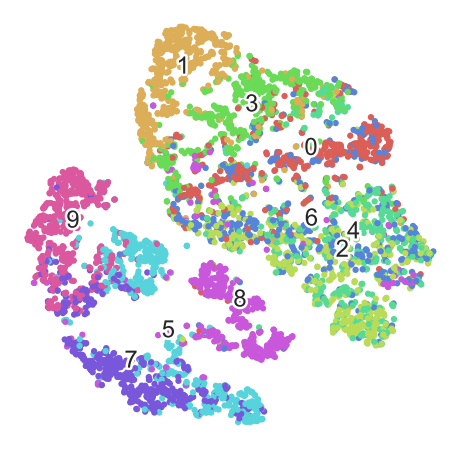

In [110]:
time_start = time.time()
fashion_tsne = TSNE(random_state=rand_seed, n_iter=500).fit_transform(X_subset)
print ('t-SNE completed...  Time elapsed: {} seconds'.format(time.time()-time_start))

time_start = time.time()
pca_5 = PCA(n_components=5)
pca_result_5 = pca_5.fit_transform(X_subset)
print ('PCA with 5 components completed... Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Cumulative variance explained by 5 principal components: {}'.format(np.sum(pca_5.explained_variance_ratio_)))

time_start = time.time()
fashion_pca_tsne = TSNE(random_state=rand_seed, n_iter=500).fit_transform(pca_result_5)
print ('t-SNE completed...  Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_viz(fashion_pca_tsne, y_subset)

# Fever components made points more centralised - closer to each other